In [1]:
import scanpy as sc
import pandas as pd
import scipy.io as scipy
import celltypist
from celltypist import models
import anndata
import matplotlib.pyplot as plt

In [2]:
matrix = scipy.mmread('/Users/gagled01/morganLab/Waldenstroms/singlecell/objects/scRNA_SCTransformed_Integrated_ReferenceAdd_Matrix.mtx')
gene_list = pd.read_table('/Users/gagled01/morganLab/Waldenstroms/singlecell/objects/scRNA_SCTransformed_Integrated_ReferenceAdd_GeneNames.txt', header = None)
cell_list = pd.read_table('/Users/gagled01/morganLab/Waldenstroms/singlecell/objects/scRNA_SCTransformed_Integrated_ReferenceAdd_CellNames.txt', header = None)

In [3]:
models.download_models(force_update = True)
model = models.Model.load(model = 'Immune_All_Low.pkl') # low hierarchy = high resolution

📜 Retrieving model list from server https://celltypist.cog.sanger.ac.uk/models/models.json
📚 Total models in list: 44
📂 Storing models in /Users/gagled01/.celltypist/data/models
💾 Downloading model [1/44]: Immune_All_Low.pkl
💾 Downloading model [2/44]: Immune_All_High.pkl
💾 Downloading model [3/44]: Adult_CynomolgusMacaque_Hippocampus.pkl
💾 Downloading model [4/44]: Adult_Human_PancreaticIslet.pkl
💾 Downloading model [5/44]: Adult_Human_Skin.pkl
💾 Downloading model [6/44]: Adult_Mouse_Gut.pkl
💾 Downloading model [7/44]: Adult_Mouse_OlfactoryBulb.pkl
💾 Downloading model [8/44]: Adult_Pig_Hippocampus.pkl
💾 Downloading model [9/44]: Adult_RhesusMacaque_Hippocampus.pkl
💾 Downloading model [10/44]: Autopsy_COVID19_Lung.pkl
💾 Downloading model [11/44]: COVID19_HumanChallenge_Blood.pkl
💾 Downloading model [12/44]: COVID19_Immune_Landscape.pkl
💾 Downloading model [13/44]: Cells_Fetal_Lung.pkl
💾 Downloading model [14/44]: Cells_Intestinal_Tract.pkl
💾 Downloading model [15/44]: Cells_Lung_Airway

In [4]:
# need to put absolute path in here apparently...bugs out if i use variable to path, despite the tutorial using a variable
# also need gene and cell files for this

# important to transpose so that the files match up
matrix = matrix.T 
predictions = celltypist.annotate(filename = '/Users/gagled01/morganLab/Waldenstroms/singlecell/objects/scRNA_SCTransformed_Integrated_ReferenceAdd_Matrix.mtx',
                                  gene_file = '/Users/gagled01/morganLab/Waldenstroms/singlecell/objects/scRNA_SCTransformed_Integrated_ReferenceAdd_GeneNames.txt',
                                  cell_file = '/Users/gagled01/morganLab/Waldenstroms/singlecell/objects/scRNA_SCTransformed_Integrated_ReferenceAdd_CellNames.txt',
                                  model = 'Immune_All_Low.pkl', majority_voting = True, transpose_input = True)

📁 Input file is '/Users/gagled01/morganLab/Waldenstroms/singlecell/objects/scRNA_SCTransformed_Integrated_ReferenceAdd_Matrix.mtx'
⏳ Loading data
🔬 Input data has 284223 cells and 45432 genes
🔗 Matching reference genes in the model
🧬 6260 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
⛓️ Over-clustering input data with resolution set to 30
🗳️ Majority voting the predictions
✅ Majority voting done!


In [5]:
predictions.predicted_labels
adata = predictions.to_adata()
adata.obs

,predicted_labels,over_clustering,majority_voting,conf_score
AAACCCAAGGCGTCCT-1_1,Regulatory T cells,13,Regulatory T cells,0.896282
AAACCCAAGGGTTTCT-1_1,Naive B cells,222,Naive B cells,0.997613
AAACCCAAGTCCGTCG-1_1,MAIT cells,62,Tem/Trm cytotoxic T cells,0.740765
AAACCCACAAGTGACG-1_1,Proliferative germinal center B cells,75,Proliferative germinal center B cells,0.533961
AAACCCAGTATCTCGA-1_1,Memory B cells,105,Memory B cells,0.986655
...,...,...,...,...
WM65-TTTGTGTTCAAACTCA-1,Naive B cells,25,Memory B cells,0.994328
WM65-TTTGTGTTCAGCATTA-1,Memory B cells,417,Memory B cells,0.972452
WM65-TTTGTGTTCGGTACGC-1,Memory B cells,25,Memory B cells,0.240538
WM65-TTTGTGTTCTTGACCC-1,Memory B cells,55,Memory B cells,0.078651


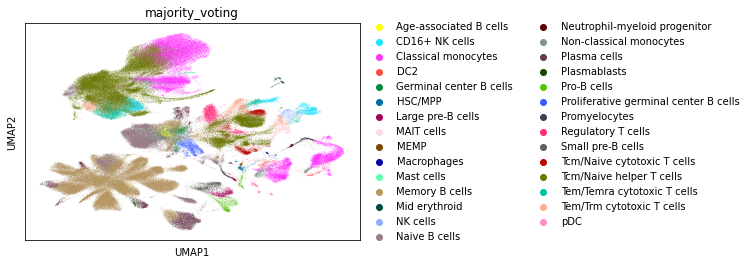

In [6]:
sc.tl.umap(adata)
sc.pl.umap(adata, color = ['majority_voting'], legend_loc = 'right margin')
#fig.set_canvas(plt.gcf().canvas)


In [7]:
anndata.AnnData.write(adata, filename = '/Users/gagled01/morganLab/Waldenstroms/singlecell/objects/scRNA_SCTransformed_Integrated_ReferenceAdd_CellTypistAnnotated.h5ad')